# Introduction to Pandas for Data Manipulation
In this exercise, we will explore **pandas** for **data manipulation** and **preprocessing**, with a focus on making data feasible for **data mining** tasks.

### What is Pandas?
Pandas is a powerful Python library for data manipulation and analysis. It provides data structures such as **Series** (1D) and **DataFrame** (2D) that allow efficient handling of structured data. Pandas is widely used for data preprocessing, exploration, and transformation.

### Installing Pandas in Jupyter Notebook
To install Pandas directly in a Jupyter Notebook, use:

In [1]:
#!pip install pandas

We'll explore:
- Loading and inspecting data
- Handling missing values
- Encoding categorical variables
- Aggregations and filtering

Let's get started!

## Loading the Dataset
First, let's load a sample dataset as a `pandas` data frame and take a look at its structure.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('golf.csv')

# Display the first few rows
df.head()

,Outlook,Humidity,Wind,Temperature C,Temperature F,Play
0,sunny,85.0,False,29.5,85.0,False
1,sunny,90.0,True,26.5,80.0,False
2,overcast,78.0,False,28.5,83.0,True
3,rain,96.0,False,21.0,70.0,True
4,rain,80.0,False,20.0,68.0,True


## Data Overview
We check for data types, missing values, and the general structure of the dataset.

In [4]:
print('Dataset Info:')
df.info()
print('\nMissing Values:')
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlook        15 non-null     object 
 1   Humidity       15 non-null     float64
 2   Wind           14 non-null     object 
 3   Temperature C  15 non-null     float64
 4   Temperature F  15 non-null     float64
 5   Play           15 non-null     bool   
dtypes: bool(1), float64(3), object(2)
memory usage: 747.0+ bytes

Missing Values:
Outlook          0
Humidity         0
Wind             1
Temperature C    0
Temperature F    0
Play             0
dtype: int64


## Handling Missing Values
If our dataset contains missing values, we need to handle them appropriately. For now, we will **remove rows with missing values** using `dropna()`. However, more strategies exist to handle this problem, which will be discussed in the next weeks.

In [5]:
# Remove rows with missing values
df = df.dropna()

# Verify that missing values are removed
print('Dataset Info:')
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlook        14 non-null     object 
 1   Humidity       14 non-null     float64
 2   Wind           14 non-null     object 
 3   Temperature C  14 non-null     float64
 4   Temperature F  14 non-null     float64
 5   Play           14 non-null     bool   
dtypes: bool(1), float64(3), object(2)
memory usage: 686.0+ bytes


When a Pandas DataFrame contains a column with boolean values (`True`/`False`) and at least one `None` value, Pandas infers the column type as `object` instead of `bool`. Even after using `dropna()`, the column remains `object` because Pandas does not automatically convert it back to `bool`.


In [6]:
df['Wind'] = df['Wind'].astype(bool)  # Convert to bool becaues itnwill intepret as STring like "True"
# Check info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlook        14 non-null     object 
 1   Humidity       14 non-null     float64
 2   Wind           14 non-null     bool   
 3   Temperature C  14 non-null     float64
 4   Temperature F  14 non-null     float64
 5   Play           14 non-null     bool   
dtypes: bool(2), float64(3), object(1)
memory usage: 588.0+ bytes


## Encoding Categorical Variables
Since `Outlook` is categorical, we convert it into numeric representations. But why?

Most machine learning models require numerical input features, as they perform mathematical operations that do not work directly with categorical data. Common encoding methods include:
- **One-Hot Encoding** – Creates binary columns for each category.
- **Label Encoding** – Assigns an integer to each category.

Encoding categorical variables allows us to:

1. **Enable Model Training** – Many models, such as linear regression and neural networks, rely on numerical inputs and cannot process text labels.
2. **Improve Interpretability** – Some encoding methods, such as ordinal encoding, can capture inherent order in categories.
3. **Capture Relationships** – Encoding strategies like one-hot encoding and target encoding help the model recognize categorical relationships in a meaningful way.
4. **Enhance Performance** – Proper encoding can improve model accuracy and efficiency by providing structured input.

In [7]:
# Label Encoding: Converts categories into ordered numeric values
df['Outlook_Int'] = df['Outlook'].astype('category').cat.codes

# Display the modified dataset
df.head()

,Outlook,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_Int
0,sunny,85.0,False,29.5,85.0,False,2
1,sunny,90.0,True,26.5,80.0,False,2
2,overcast,78.0,False,28.5,83.0,True,0
3,rain,96.0,False,21.0,70.0,True,1
4,rain,80.0,False,20.0,68.0,True,1


However, note that **label encoding assigns arbitrary numerical values**, introducing an intrinsic order to the data.  
To avoid this, we can alternatively use **one-hot encoding**, which creates separate binary columns for each category.

In [8]:
# One-Hot Encoding: Creates separate binary columns for each category
df = pd.get_dummies(df, columns=['Outlook'], prefix='Outlook')

# Display the dataset after One-Hot Encoding
df.head()

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_Int,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,85.0,False,2,False,False,True
1,90.0,True,26.5,80.0,False,2,False,False,True
2,78.0,False,28.5,83.0,True,0,True,False,False
3,96.0,False,21.0,70.0,True,1,False,True,False
4,80.0,False,20.0,68.0,True,1,False,True,False


Redundant columns can be removed via `df.drop()`:

In [9]:
# Drop the label-encoded column
df = df.drop(columns=['Outlook_Int'])

# Display the dataset after One-Hot Encoding
df.head()

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,85.0,False,False,False,True
1,90.0,True,26.5,80.0,False,False,False,True
2,78.0,False,28.5,83.0,True,True,False,False
3,96.0,False,21.0,70.0,True,False,True,False
4,80.0,False,20.0,68.0,True,False,True,False


## Aggregations
Aggregating numerical features by categorical target values can help us understand how different categories relate to numerical trends. In this case, we compute the average humidity for each `Play` type (e.g., "False" or "True") to analyze how humidity levels vary depending on whether a game was played.

In [10]:
df.groupby('Play')['Humidity'].mean()

Play
False    84.000000
True     78.222222
Name: Humidity, dtype: float64

### Benefits of Aggregating by Target:
1. **Feature Engineering** – We can create new features that highlight statistical differences between categories.
2. **Exploratory Data Analysis (EDA)** – Identifies patterns in how numerical features differ across target values.
3. **Potential Insights for Modeling** – If a numerical feature shows significant differences across target categories, it could be an important predictor.
4. **Outlier Detection** – Aggregations can reveal anomalies in the data that might affect model performance.

For instance, if the average humidity is significantly lower for `Play = Yes` compared to `Play = No`, humidity might be a strong predictor of whether a game is played.

## Filtering Data
We can filter rows where `Play` is true.

In [11]:
df[df['Play']]

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
2,78.0,False,28.5,83.0,True,True,False,False
3,96.0,False,21.0,70.0,True,False,True,False
4,80.0,False,20.0,68.0,True,False,True,False
6,65.0,True,18.0,64.0,True,True,False,False
8,70.0,False,20.5,69.0,True,False,False,True
9,80.0,False,24.0,75.0,True,False,True,False
10,70.0,True,24.0,75.0,True,False,False,True
11,90.0,True,22.0,72.0,True,True,False,False
12,75.0,False,27.0,81.0,True,True,False,False


## Identifying Feature Correlations

### Why Analyze Feature Correlations?
Understanding the correlations between features in a dataset is crucial for effective data analysis and machine learning. Identifying these relationships helps in:

1. **Detecting Multicollinearity** – Highly correlated features may introduce redundancy, leading to unstable model coefficients, especially in regression models.
2. **Feature Selection** – Strongly correlated features can be reduced or removed to simplify models without losing significant information.
3. **Improving Model Performance** – Models trained on highly correlated variables may overfit, making generalization difficult. Identifying correlations helps in choosing relevant features.
4. **Data Interpretation** – Correlation analysis provides insights into how features interact, helping to uncover underlying relationships in the data.
5. **Avoiding Bias in Feature Engineering** – If two features are highly correlated, derived features (e.g., polynomial combinations) may introduce unnecessary complexity.

### Next Steps
To better understand feature relationships, we compute and analyze the correlation matrix.

In [12]:
correlation_matrix = df.corr()

print(correlation_matrix.round(2))

                  Humidity  Wind  Temperature C  Temperature F  Play  \
Humidity              1.00 -0.25           0.25           0.27 -0.29   
Wind                 -0.25  1.00          -0.33          -0.33 -0.26   
Temperature C         0.25 -0.33           1.00           1.00 -0.11   
Temperature F         0.27 -0.33           1.00           1.00 -0.12   
Play                 -0.29 -0.26          -0.11          -0.12  1.00   
Outlook_overcast     -0.22  0.09           0.15           0.14  0.47   
Outlook_rain          0.07 -0.04          -0.44          -0.44 -0.07   
Outlook_sunny         0.13 -0.04           0.30           0.31 -0.38   

                  Outlook_overcast  Outlook_rain  Outlook_sunny  
Humidity                     -0.22          0.07           0.13  
Wind                          0.09         -0.04          -0.04  
Temperature C                 0.15         -0.44           0.30  
Temperature F                 0.14         -0.44           0.31  
Play                 

When two or more features are highly correlated, one common strategy is to **remove one of the correlated columns**.

In [13]:
# Drop the label-encoded column
df = df.drop(columns=['Temperature F'])

# Display the dataset after One-Hot Encoding
df.head()

,Humidity,Wind,Temperature C,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,False,False,False,True
1,90.0,True,26.5,False,False,False,True
2,78.0,False,28.5,True,True,False,False
3,96.0,False,21.0,True,False,True,False
4,80.0,False,20.0,True,False,True,False


# Your first little ML pipeline with pandas and scikit

## What is Scikit-Learn?
Scikit-Learn is one of the most widely used libraries for machine learning in Python. It provides simple and efficient tools for classification, regression, clustering, dimensionality reduction, and more. It is built on top of **NumPy, SciPy, and Matplotlib**.

## Installing Scikit-Learn in Jupyter Notebook
To install Scikit-Learn in a Jupyter Notebook, use:

In [14]:
#!pip install scikit-learn

![Alt text](https://miro.medium.com/v2/resize:fit:1400/0*jSSOS4XfwothU7oQ.jpg)

## $k$-Nearest Neighbors: Classification as simple as it gets

### What is $k$-NN?
$k$-Nearest Neighbors ($k$-NN) is a simple and intuitive machine learning algorithm used for classification and regression. It classifies new data points based on the majority class of their nearest neighbors.

### How does $k$-NN work?
1. Select a number $k$ (typically an odd number to avoid ties).
2. Calculate the distance (e.g., Euclidean) from the new data point to all existing labeled data points.
3. Identify the $k$ closest neighbors.
4. Assign the most common label among the neighbors to the new data point.

### Strengths of $k$-NN:
- **Simple & Effective** for small datasets.
- **No Training Phase** – Just stores the dataset and finds neighbors at prediction time.
- **Works with Non-Linear Decision Boundaries** since it is distance-based.

### Limitations:
- **Computationally Expensive** for large datasets (since distances are computed for every new query).
- **Sensitive to Feature Scaling** (e.g., temperature in °C and humidity in % have different scales).
- **Choice of $k$ Matters** – A too-small $k$ leads to noise, while a too-large $k$ can dilute local patterns.

We will learn about $k$-NN by considering a toy example first and then apply the methods to the golf dataset.


### Step 1: Create a Toy Dataset
We generate a small dataset with two features (`X1`, `X2`) and a binary class (`y`), where each point belongs to either Class 0 (red) or Class 1 (blue).


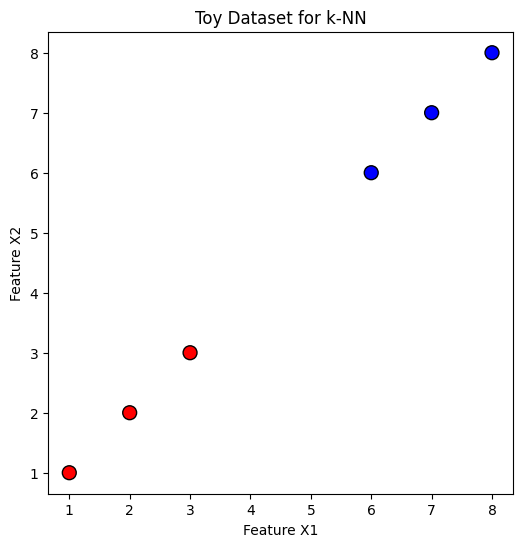

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate toy dataset (manually defined)
toy_data = {
    'X1': [1, 2, 3, 6, 7, 8],
    'X2': [1, 2, 3, 6, 7, 8],
    'y': [0, 0, 0, 1, 1, 1]  # Class labels
}

# Convert to DataFrame
toy_df = pd.DataFrame(toy_data)

# Visualize the data
plt.figure(figsize=(6, 6))
colors = ['red' if label == 0 else 'blue' for label in toy_df['y']]
plt.scatter(toy_df['X1'], toy_df['X2'], c=colors, edgecolors='black', s=100)

plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Toy Dataset for k-NN")
plt.show()


### Step 2: Introduce a New Point to Classify
Now, we introduce a **new data point** (marked in green) that we want to classify using k-NN.


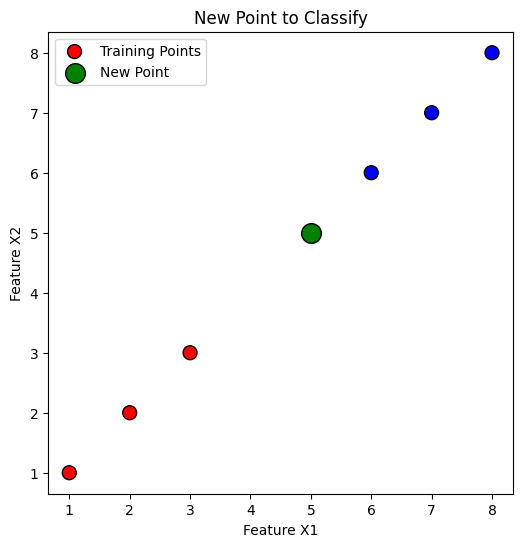

In [17]:
# Define the new point to classify
new_point = np.array([[5, 5]])

# Plot dataset with the new point
plt.figure(figsize=(6, 6))
plt.scatter(toy_df['X1'], toy_df['X2'], c=colors, edgecolors='black', s=100, label="Training Points")
plt.scatter(new_point[0, 0], new_point[0, 1], color="green", edgecolors="black", s=200, label="New Point")

plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.legend()
plt.title("New Point to Classify")
plt.show()

### Step 3: Compute Distances
To classify the new point, we calculate the Euclidean distance between the new point and all existing points.


In [19]:
from scipy.spatial import distance

# Compute distances
toy_df['Distance'] = toy_df.apply(lambda row: distance.euclidean((row['X1'], row['X2']), new_point[0]), axis=1)

# Display distances
toy_df_sorted = toy_df.sort_values(by='Distance')
print(toy_df_sorted[['X1', 'X2', 'y', 'Distance']])


   X1  X2  y  Distance
3   6   6  1  1.414214
2   3   3  0  2.828427
4   7   7  1  2.828427
1   2   2  0  4.242641
5   8   8  1  4.242641
0   1   1  0  5.656854


### Step 4: Identify the k Nearest Neighbors (k=3)
We take the closest `k=3` points and check their labels.

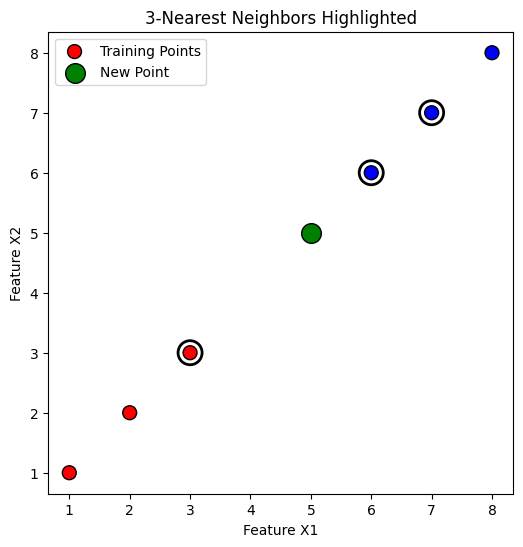

In [20]:
# Select the k-nearest neighbors
k = 3
nearest_neighbors = toy_df_sorted.iloc[:k]

# Visualize neighbors
plt.figure(figsize=(6, 6))
plt.scatter(toy_df['X1'], toy_df['X2'], c=colors, edgecolors='black', s=100, label="Training Points")
plt.scatter(new_point[0, 0], new_point[0, 1], color="green", edgecolors="black", s=200, label="New Point")
plt.scatter(nearest_neighbors['X1'], nearest_neighbors['X2'], edgecolors='black', facecolors='none', s=300, linewidth=2)

plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.legend()
plt.title(f"{k}-Nearest Neighbors Highlighted")
plt.show()

### Step 5: Implementing k-NN Using Scikit-Learn
Now that we understand the concept, we use Scikit-Learn to train and classify the new point.


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Define features and target
X = toy_df[['X1', 'X2']]
y = toy_df['y']

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Convert new_point to a DataFrame with the correct feature names
new_point_df = pd.DataFrame(new_point, columns=['X1', 'X2'])

# Predict the class of the new point
prediction = knn.predict(new_point_df)

print(f"Scikit-Learn Predicted Class: {prediction[0]}")


Scikit-Learn Predicted Class: 1


## k-NN for Golf Dataset

In [25]:
df.head()

,Humidity,Wind,Temperature C,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,False,False,False,True
1,90.0,True,26.5,False,False,False,True
2,78.0,False,28.5,True,True,False,False
3,96.0,False,21.0,True,False,True,False
4,80.0,False,20.0,True,False,True,False


In [26]:
target = df['Play']

df = df.drop(columns=['Play'])

df.head()

,Humidity,Wind,Temperature C,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,False,False,True
1,90.0,True,26.5,False,False,True
2,78.0,False,28.5,True,False,False
3,96.0,False,21.0,False,True,False
4,80.0,False,20.0,False,True,False


In [27]:
# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df, target)

KNeighborsClassifier(n_neighbors=3)

So far, we have trained the k-NN model on the **entire dataset**, meaning it has seen all available data points during training. However, this does not tell us whether the model generalizes well to new, unseen data. To properly evaluate the model, we now use a **separate test dataset** that was not involved in training. This allows us to assess how well k-NN performs in real-world, unseen scenarios.


In [28]:
# Load the dataset
df_test = pd.read_csv('golf_test.csv')

# Apply the same preprocessing steps as for the training data

df_test = df_test.drop(columns=['Temperature F'])

df_test = pd.get_dummies(df_test, columns=['Outlook'], prefix='Outlook')

# Display the first few rows
df_test.head()

,Humidity,Wind,Temperature C,Outlook_overcast,Outlook_rain,Outlook_sunny
0,80.0,False,28.5,False,False,True
1,84.0,False,24.0,False,True,False
2,80.0,True,22.5,True,False,False


In [29]:
knn.predict(df_test)

array([ True,  True,  True])

# What’s Next? Key Considerations

## What’s Next? Key Considerations

While we implemented k-NN, there are important steps we must consider before using it in a real application:

1. **Feature Normalization**  
   - k-NN is **distance-based**, so features with different scales (e.g., °C vs. %) should be normalized.
   - Methods: **Min-Max Scaling**, **Standardization (Z-score normalization)**.

2. **Train-Test Split**  
   - The model should be evaluated on unseen data, not just trained on the full dataset.
   - Use **train-test splitting** (e.g., 80% training, 20% testing) to measure generalization.

3. **Choosing the Right $k$**  
   - Small $k$ (e.g., 1-3) → sensitive to noise, overfits.
   - Large $k$ → smooths decision boundary, may underfit.
   - **Use cross-validation to select the best k**.

4. **Performance Evaluation (Not Yet Done!)**  
   - **So far, no evaluation has been performed at all.**
   - To assess model quality, we need metrics like:
     - **Accuracy**
     - **Confusion Matrix**
     - **Precision, Recall, F1-score**
     - **ROC/AUC for probability-based outputs**.

5. **Handling Missing Data**  
   - $k$-NN cannot handle missing values directly, so we need to preprocess missing data (e.g., imputation).

### Next Steps:
In the next steps, we will **normalize the data**, **split it into train-test sets**, and **evaluate the model properly**.
